For this project I want to explore the data set of one of my favorite video games "Valorant". Just for context this game is a first person shooter that consists in the typical 5v5 attackers and defenders. The attackers need to plant the spike and the defenders need to stop or diffuse the spike. This game has a competitive mode that it will be the focus on this notebook. As the general goal is to predict the rating of players based on stats such as head shot percentage, combat score and others.

In [91]:
#doing some initial data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("val_stats.csv",low_memory=False)

print(data.shape)


(85678, 38)


In [95]:
#Getting the mean and max values of the data
numeric_data = data.select_dtypes(include=['float64', 'int64'])

mean = numeric_data.mean()
max = numeric_data.max()
min = numeric_data.min()
std = numeric_data.std()
median = numeric_data.median()

print("Average: ",mean)
print("Maximum: ",max)
print("Minimum: ",min)
print("Standard Deviation: ",std)
print("Median: ",median)


Average:  damage_round        142.815934
headshot_percent     23.599013
aces                  1.058697
clutches             66.347254
flawless             39.112258
kd_ratio              1.053942
kills_round           0.758051
most_kills           28.164371
score_round         218.225829
wins                 23.784904
win_percent          53.878930
gun1_head            34.225285
gun1_body            61.354478
gun1_legs             4.418334
gun2_head            30.464647
gun2_body            64.986228
gun2_legs             4.510925
gun3_head            30.647097
gun3_body            64.857058
gun3_legs             4.310313
gun3_kills           59.421672
dtype: float64
Maximum:  damage_round        340.6
headshot_percent     83.3
aces                 24.0
clutches            488.0
flawless            316.0
kd_ratio              6.5
kills_round           2.0
most_kills           58.0
score_round         550.5
wins                170.0
win_percent         100.0
gun1_head           100.0
gu

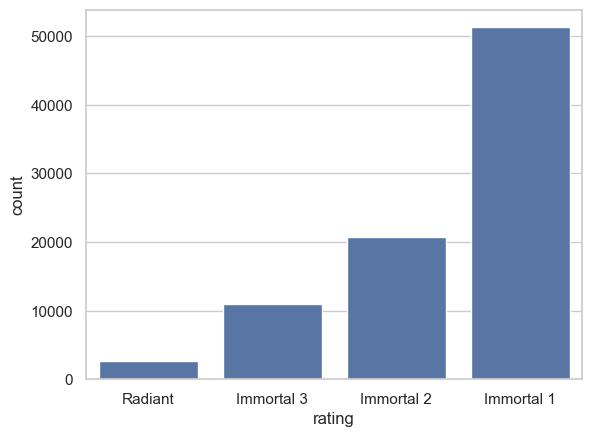

In [102]:
#creating the rating distribution only including Radiant, Immortal 1 and Immortal 2 and 3
# Display unique values in the 'rating' column
data['rating'].unique()

# Create a list of the unique values in the 'rating' column
ratings = ['Radiant', 'Immortal 1', 'Immortal 2', 'Immortal 3']

# Filter the data so that only the selected ratings are included
filtered_data = data[data['rating'].isin(ratings)]

# Create a count plot of the 'rating' column
sns.countplot(data=filtered_data, x='rating')

# Display the plot
plt.show()





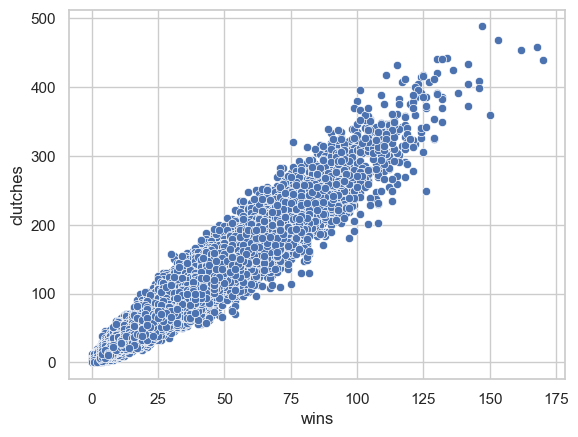

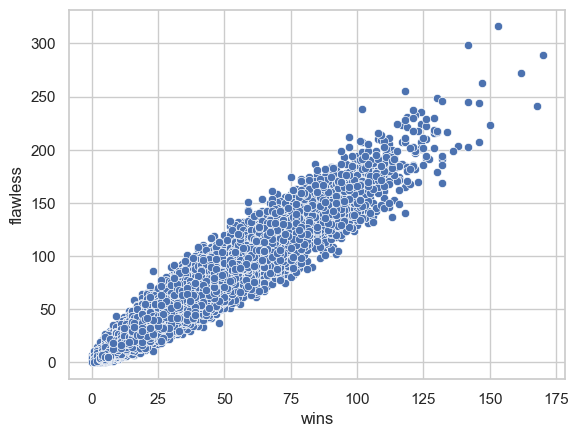

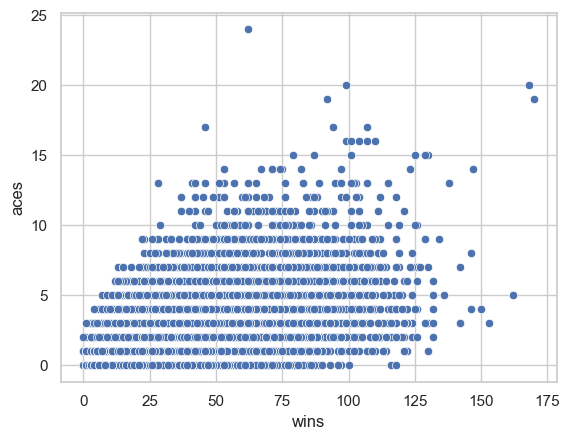

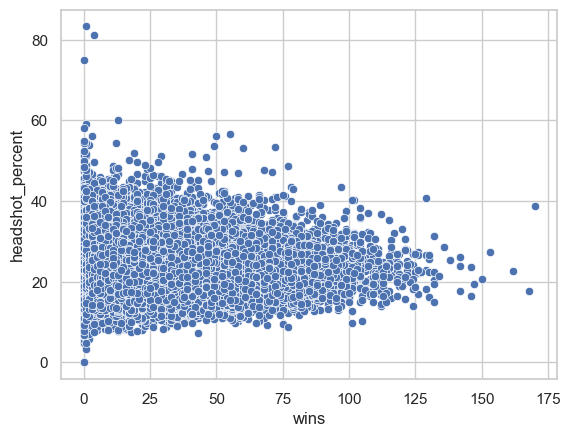

In [107]:
#wins scatter plot compared with bunch of other variables

# Create a scatter plot of 'wins' against 'clutches'
sns.scatterplot(data=data, x='wins', y='clutches')

# Display the plot
plt.show()

# Create a scatter plot of 'wins' against 'clutches'
sns.scatterplot(data=data, x='wins', y='flawless')

# Display the plot
plt.show()

# Create a scatter plot of 'wins' against 'clutches'
sns.scatterplot(data=data, x='wins', y='aces')

# Display the plot
plt.show()

# Create a scatter plot of 'wins' against 'clutches'
sns.scatterplot(data=data, x='wins', y='headshot_percent')

# Display the plot
plt.show()


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("val_stats.csv",low_memory=False)

print(data.head())
# Get the shape of the dataset
print(data.shape)



  region           name     tag   rating  damage_round headshots  \
0    NaN       ShimmyXD    #NA1  Radiant         135.8       992   
1    NaN      XSET Cryo  #cells  Radiant         170.3       879   
2    NaN  PuRelittleone  #yoruW  Radiant         147.5       720   
3    NaN           Boba   #0068  Radiant         178.2       856   
4    NaN    i love mina  #kelly  Radiant         149.8       534   

   headshot_percent  aces  clutches  flawless  ... gun2_name gun2_head  \
0              24.9     0       140        80  ...   Phantom        33   
1              28.3     2       122        94  ...  Operator         8   
2              24.0     3       117        59  ...   Phantom        36   
3              37.3     3        83        49  ...   Sheriff        48   
4              24.4     2        71        38  ...   Spectre        21   

  gun2_body gun2_legs  gun2_kills  gun3_name  gun3_head  gun3_body  gun3_legs  \
0        62         5         220    Classic         36         6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85674 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

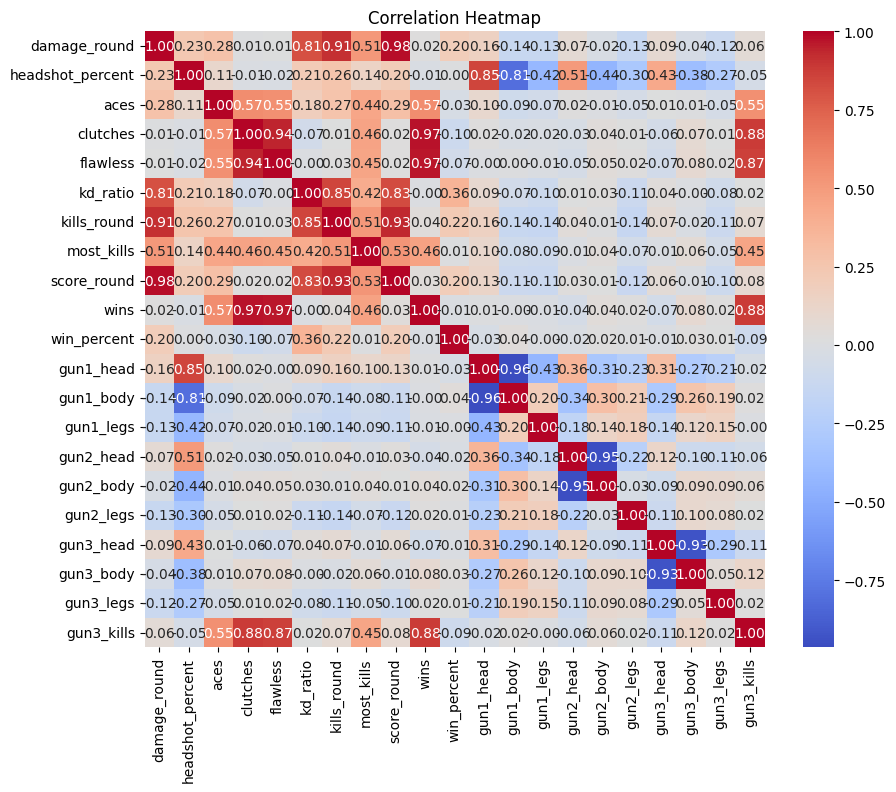

In [3]:
# Step 4: Check for missing values
data.info()

# Step 5: Display summary statistics
data.describe()

# Step 6: Visualizations
# Step 6.1: Select only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 6.2: Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [4]:
# Display unique values in the 'rating' column
data['rating'].unique()




array(['Radiant', 'Immortal 3', 'Immortal 2', 'Immortal 1', 'Silver 2',
       'Gold 2', 'Diamond 3', 'Gold 1', 'Unrated', 'Platinum 1',
       'Bronze 3', 'Gold 3', 'Bronze 2', 'Diamond 2', 'Silver 3',
       'Silver 1', 'Platinum 2', 'Diamond 1', 'Platinum 3'], dtype=object)

In [5]:
rank_mapping = {
    "Immortal 1": 1,
    "Immortal 2": 2,
    "Immortal 3": 3,
    "Radiant": 4
}

# Map the values
data['rating'] = data['rating'].map(rank_mapping)

# Check for NaN values after mapping
print(data['rating'].isna().sum())


104


In [6]:
# Remove rows with NaN in the 'rating' column
data_cleaned = data.dropna(subset=['rating'])

# Check the shape again
print(data_cleaned.shape)



(85574, 38)


In [7]:
data['rating'].unique()

array([ 4.,  3.,  2.,  1., nan])

We want to get rid of the other players, we only want this specific ranks to make a prediction.

In [8]:
# Get the shape of the dataset
print(data_cleaned.shape)


(85574, 38)


In [9]:
data_cleaned['rating'].unique()

array([4., 3., 2., 1.])

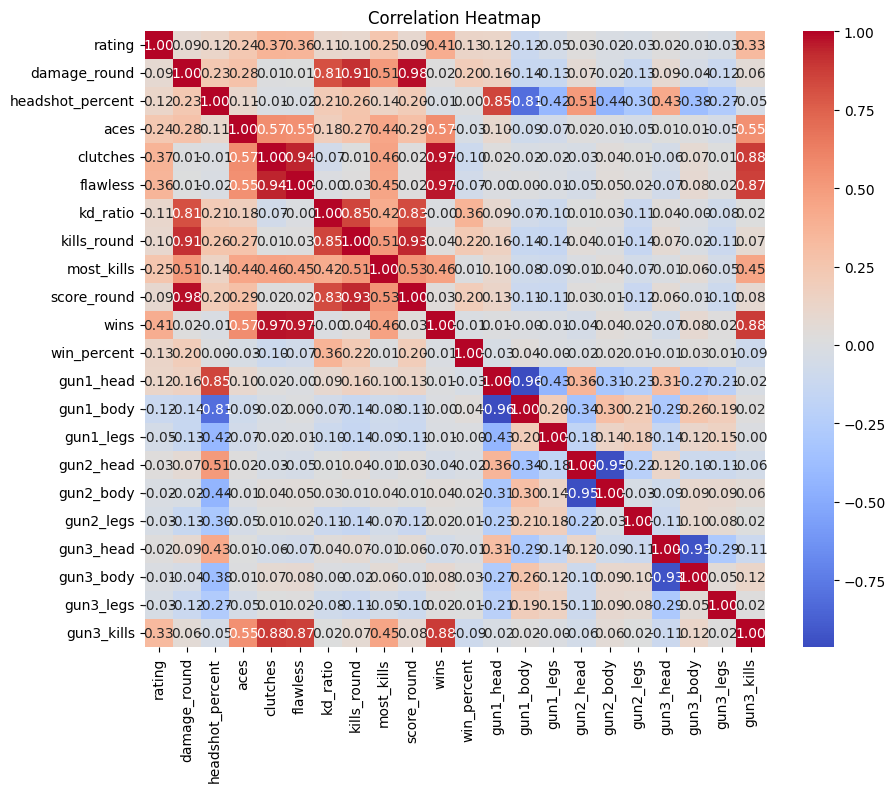

In [10]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 6.2: Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


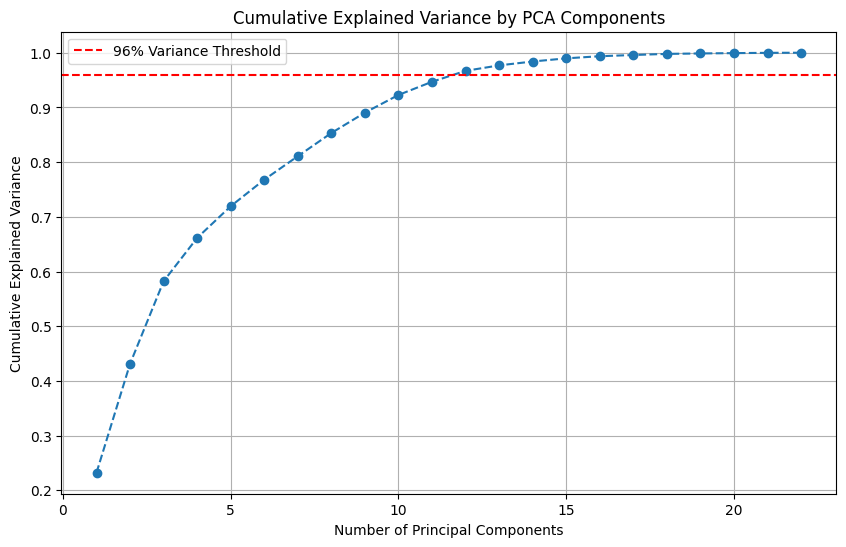

Number of components needed to explain 96% of the variance: 12
Principal Component 1: 23.22% of variance explained
Principal Component 2: 19.91% of variance explained
Principal Component 3: 15.09% of variance explained
Principal Component 4: 7.92% of variance explained
Principal Component 5: 5.79% of variance explained
Principal Component 6: 4.86% of variance explained
Principal Component 7: 4.29% of variance explained
Principal Component 8: 4.24% of variance explained
Principal Component 9: 3.72% of variance explained
Principal Component 10: 3.23% of variance explained
Principal Component 11: 2.41% of variance explained
Principal Component 12: 2.00% of variance explained
Principal Component 13: 1.00% of variance explained
Principal Component 14: 0.71% of variance explained
Principal Component 15: 0.58% of variance explained
Principal Component 16: 0.39% of variance explained
Principal Component 17: 0.22% of variance explained
Principal Component 18: 0.20% of variance explained
Princip

In [53]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Select numeric columns for PCA
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Step 3: Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_columns)

# Step 4: Apply PCA
pca = PCA()
pca.fit(standardized_data)

# Step 5: Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Step 6: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.96, color='r', linestyle='--', label='96% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

# Step 7: Determine the number of components to explain 96% variance
components_needed = (cumulative_variance >= 0.96).argmax() + 1
print(f"Number of components needed to explain 96% of the variance: {components_needed}")

# Step 8: Analyze the relative importance of the principal components
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.2%} of variance explained")


In [54]:
# Step 1: Extract the PCA components (loadings)
loadings = pd.DataFrame(pca.components_, columns=numeric_columns.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Step 2: Display the loadings for all components
print("Principal Component Loadings:")
display(loadings)

# Step 3: Analyze the most important features for each component
# Sort features by absolute value of loadings for each component
for i in range(loadings.shape[0]):
    print(f"\nTop features contributing to PC{i+1}:")
    top_features = loadings.iloc[i].abs().sort_values(ascending=False).head(5)
    print(top_features)


Principal Component Loadings:


,rating,damage_round,headshot_percent,aces,clutches,flawless,kd_ratio,kills_round,most_kills,score_round,...,gun1_head,gun1_body,gun1_legs,gun2_head,gun2_body,gun2_legs,gun3_head,gun3_body,gun3_legs,gun3_kills
PC1,1.834825e-01,2.957597e-01,0.200016,0.285540,0.277525,0.276354,0.254692,0.297604,0.321916,0.297653,...,0.178199,-0.161537,-0.113345,0.081701,-0.056138,-0.085494,0.068639,-0.041031,-0.076392,0.272494
PC2,-9.174972e-02,1.691788e-01,0.317465,-0.142446,-0.314791,-0.316666,0.157539,0.163045,-0.071270,0.152146,...,0.279794,-0.262597,-0.149544,0.212003,-0.184674,-0.124523,0.214468,-0.196354,-0.121999,-0.308396
PC3,-8.046406e-02,3.219471e-01,-0.253821,-0.041393,-0.182448,-0.162944,0.342134,0.323215,0.104238,0.339598,...,-0.277866,0.272855,0.112125,-0.237033,0.234592,0.054147,-0.175353,0.175739,0.070336,-0.125146
PC4,1.533357e-02,-1.663834e-02,-0.019504,0.018420,0.022328,0.022409,-0.014268,-0.014512,-0.004456,-0.012742,...,-0.017910,0.016375,0.012230,-0.450907,0.463225,-0.012741,0.536756,-0.527932,-0.102815,-0.002571
PC5,1.475057e-02,-5.990960e-02,0.127349,-0.040966,-0.028950,-0.038180,-0.051602,-0.025510,0.009677,-0.050038,...,0.346135,-0.301273,-0.277316,-0.374122,0.453683,-0.271341,-0.335542,0.365990,-0.055994,-0.019106
PC6,5.172656e-01,-1.086895e-01,0.047780,-0.143953,-0.016332,0.008960,0.109827,-0.066161,-0.152301,-0.111008,...,0.084889,-0.099176,0.027011,-0.057946,0.031376,0.116758,-0.026696,-0.001242,0.136384,-0.044309
PC7,-4.462802e-02,1.265719e-02,0.016372,0.014567,0.004458,0.006962,0.012069,0.012537,0.003026,0.014437,...,0.008569,-0.030222,0.076200,0.073782,0.046914,-0.461545,-0.025277,-0.201850,0.851666,0.006480
PC8,-7.698686e-02,4.632277e-02,0.075899,0.020874,-0.012380,-0.020148,-0.001256,0.041337,0.063677,0.052394,...,0.250101,-0.372767,0.368338,-0.175391,-0.001330,0.686032,-0.064102,-0.009325,0.315579,-0.014003
PC9,1.462073e-01,2.828029e-03,0.003359,-0.008787,-0.009032,-0.014723,-0.006306,-0.000918,-0.009487,0.007476,...,-0.012833,-0.209896,0.823083,0.053154,0.054718,-0.402842,-0.004976,0.079628,-0.282632,-0.013709
PC10,7.888142e-01,4.136941e-02,-0.044947,-0.158286,-0.090231,-0.108884,-0.050897,0.025699,0.155159,0.045118,...,-0.074778,0.107718,-0.098675,0.016277,-0.031328,0.051630,0.004843,-0.018986,0.053615,-0.100767



Top features contributing to PC1:
most_kills      0.321916
score_round     0.297653
kills_round     0.297604
damage_round    0.295760
wins            0.285634
Name: PC1, dtype: float64

Top features contributing to PC2:
headshot_percent    0.317465
wins                0.317319
flawless            0.316666
clutches            0.314791
gun3_kills          0.308396
Name: PC2, dtype: float64

Top features contributing to PC3:
kd_ratio        0.342134
score_round     0.339598
kills_round     0.323215
damage_round    0.321947
gun1_head       0.277866
Name: PC3, dtype: float64

Top features contributing to PC4:
gun3_head    0.536756
gun3_body    0.527932
gun2_body    0.463225
gun2_head    0.450907
gun3_legs    0.102815
Name: PC4, dtype: float64

Top features contributing to PC5:
gun2_body    0.453683
gun2_head    0.374122
gun3_body    0.365990
gun1_head    0.346135
gun3_head    0.335542
Name: PC5, dtype: float64

Top features contributing to PC6:
win_percent    0.763742
rating         0.5172

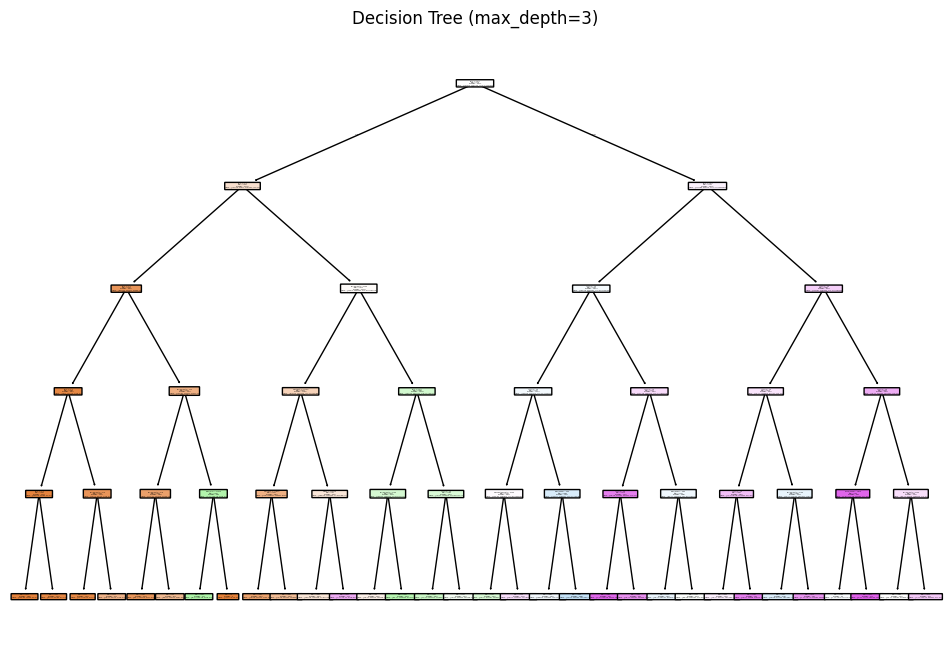

Accuracy Score: 0.47111751645697814
Confusion Matrix:  [[8063 3063 2477 1665]
 [1287 2211 1459 1368]
 [ 268  701 1306 1042]
 [  10   82  156  515]]
Classification Report:                precision    recall  f1-score   support

         1.0       0.84      0.53      0.65     15268
         2.0       0.37      0.35      0.36      6325
         3.0       0.24      0.39      0.30      3317
         4.0       0.11      0.67      0.19       763

    accuracy                           0.47     25673
   macro avg       0.39      0.49      0.37     25673
weighted avg       0.62      0.47      0.52     25673



In [14]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train a Decision Tree with class weighting
tree_clf = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
tree_clf.fit(X_train, y_train)

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True, rounded=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

# Step 6: Evaluate the Decision Tree
# Predict the test set
y_pred = tree_clf.predict(X_test)

print("Accuracy Score:" , accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))




In [15]:

from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_clf.fit(X_train, y_train)


y_pred_rf = rf_clf.predict(X_test)

print("Accuracy Score:" , accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))


Accuracy Score: 0.47111751645697814
Confusion Matrix:  [[8063 3063 2477 1665]
 [1287 2211 1459 1368]
 [ 268  701 1306 1042]
 [  10   82  156  515]]
Classification Report:                precision    recall  f1-score   support

         1.0       0.84      0.53      0.65     15268
         2.0       0.37      0.35      0.36      6325
         3.0       0.24      0.39      0.30      3317
         4.0       0.11      0.67      0.19       763

    accuracy                           0.47     25673
   macro avg       0.39      0.49      0.37     25673
weighted avg       0.62      0.47      0.52     25673



In [16]:
#improving the model
#I have to balance the data set as classes are very unbalanced
# Step 1: Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Apply SMOTE to balance the classes
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy Score: 0.581778522182838
Confusion Matrix:
 [[11607  2203  1415   142]
 [ 2983  1861  1240   126]
 [  904   866  1358   188]
 [  105   132   433   110]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.74      0.76      0.75     15367
         2.0       0.37      0.30      0.33      6210
         3.0       0.31      0.41      0.35      3316
         4.0       0.19      0.14      0.16       780

    accuracy                           0.58     25673
   macro avg       0.40      0.40      0.40     25673
weighted avg       0.58      0.58      0.58     25673



In [72]:
#Lets try some gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train)

# Step 5: Evaluate the Gradient Boosting Classifier
y_pred_gb = gb_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))



Accuracy Score: 0.6229112296965684


In [73]:
#lets try to balance the classes also for gradient boosting
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Apply SMOTE to balance the classes
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the Gradient Boosting Classifier
y_pred_gb = gb_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))

Accuracy Score: 0.5771043508744595


In [74]:
#Now lets try using adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train an AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

# Step 5: Evaluate the AdaBoost Classifier
y_pred_ada = ada_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_ada))


C:\Users\ferfe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.6125501499629962


In [75]:
#Now lets try using a MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train an MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Step 5: Evaluate the MLP Classifier
y_pred_mlp = mlp_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))

Accuracy Score: 0.6096287928952596


In [76]:
#improving the model by scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Step 5: Train an MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Step 6: Evaluate the MLP Classifier
y_pred_mlp = mlp_clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))

Accuracy Score: 0.5706384138978694


In [77]:
#improving the model by scaling the data and using cross validation to find the best parameters for the model
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['rating'])  # Features
y = data_cleaned['rating']  # Target

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Step 5: Train an MLP Classifier with Grid Search
mlp_clf = MLPClassifier(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100, 50)],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(mlp_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best MLP Classifier
best_mlp_clf = grid_search.best_estimator_
y_pred_mlp = best_mlp_clf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))


Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Accuracy Score: 0.6003194017060726


After try some cross validation and differnt algorithms I think my hypothesis will change as I dont think we have enough correlation to predict with sufficient accuracy the rating of people so i will try to find anther meaningful metric to predict 

In [79]:
#getting each column name 
data_cleaned.columns

Index(['region', 'name', 'tag', 'rating', 'damage_round', 'headshots',
       'headshot_percent', 'aces', 'clutches', 'flawless', 'first_bloods',
       'kills', 'deaths', 'assists', 'kd_ratio', 'kills_round', 'most_kills',
       'score_round', 'wins', 'win_percent', 'agent_1', 'agent_2', 'agent_3',
       'gun1_name', 'gun1_head', 'gun1_body', 'gun1_legs', 'gun1_kills',
       'gun2_name', 'gun2_head', 'gun2_body', 'gun2_legs', 'gun2_kills',
       'gun3_name', 'gun3_head', 'gun3_body', 'gun3_legs', 'gun3_kills'],
      dtype='object')

Mean Squared Error: 19.61016972549906
R2 Score: 0.9418481831124204


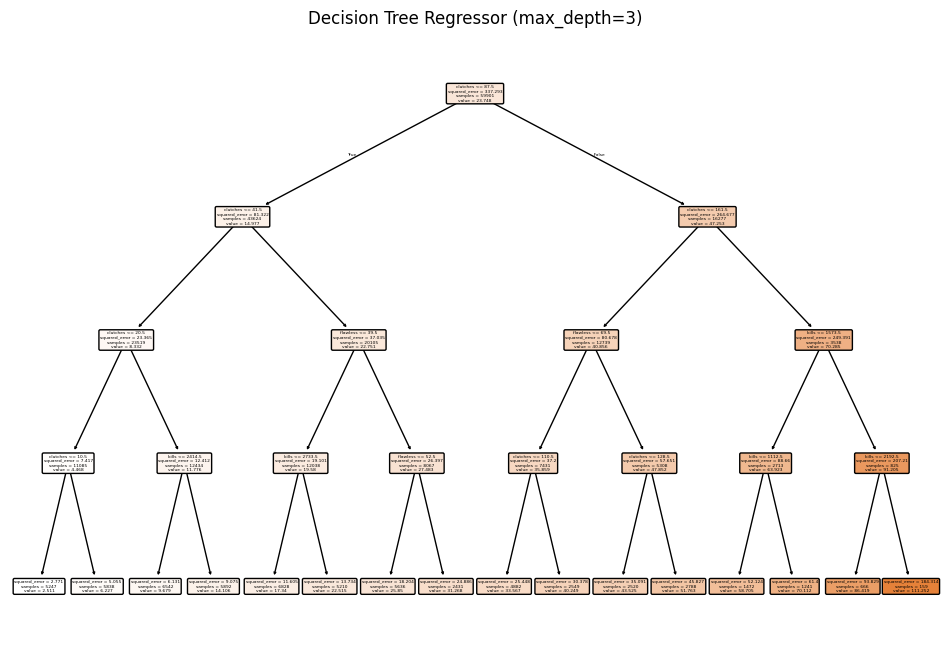

In [86]:
#Finding a better parameter to predict as there is not enough correlation between the features and the target
#Lets see again the correlation between the features and the target
#lets get a heat map of the correlation between the features and the target
#lets try to predict win with the data we have 

#Lets do a regressor tree to try to predict wins of the players according to their stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['wins','win_percent']) 
y = data_cleaned['wins']

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)

# Step 5: Evaluate the Decision Tree Regressor
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))

#lets plot the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()






In [119]:
#lets try use gradient boosting and see the weights of the features
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['wins','win_percent'])
y = data_cleaned['wins']

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100)
gb_reg.fit(X_train, y_train)

# Step 5: Evaluate the Gradient Boosting Regressor
y_pred = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 8.945913842524687
R2 Score: 0.9734063388039238


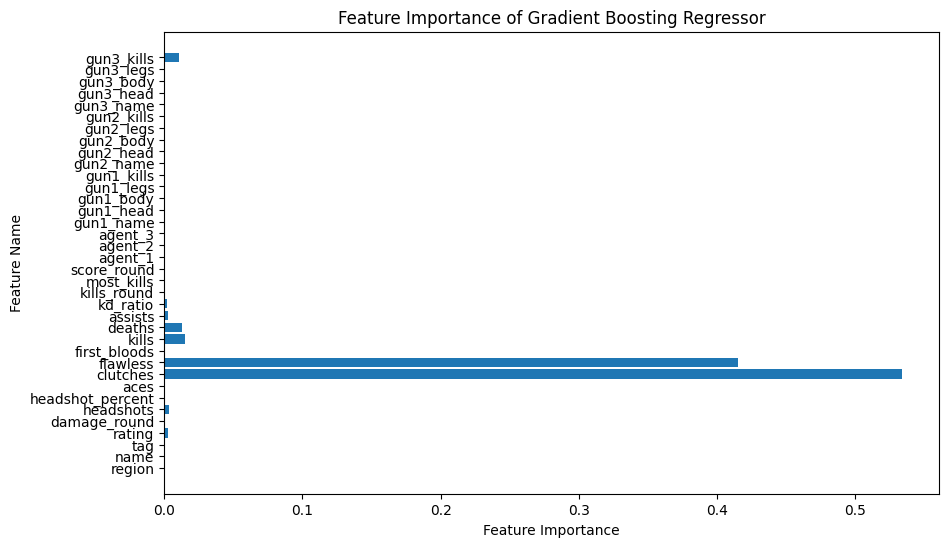

In [88]:
#lets see the feature importance
import matplotlib.pyplot as plt

feature_importance = gb_reg.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance of Gradient Boosting Regressor')
plt.show()


In [116]:
#lets try to use ada boost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['wins','win_percent'])
y = data_cleaned['wins']

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train an AdaBoost Regressor
ada_reg = AdaBoostRegressor(n_estimators=100)
ada_reg.fit(X_train, y_train)

# Step 5: Evaluate the AdaBoost Regressor
y_pred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 21.775033004651235
R2 Score: 0.9341404801722243


In [117]:
#Lets try to use random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['wins','win_percent'])
y = data_cleaned['wins']

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

# Step 5: Evaluate the Random Forest Regressor
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 8.689914824913332
R2 Score: 0.9738926152590768


In [89]:
#lets use an MLP regressor to predict the wins
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['wins','win_percent'])
y = data_cleaned['wins']

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Step 5: Train

mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_reg.fit(X_train, y_train)

# Step 6: Evaluate the MLP Regressor
y_pred = mlp_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 8.303282635038466
R2 Score: 0.9755196195039987


In [120]:
#now lets do some grid search and cross validation to find the best parameters for the MLP regressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

# Step 2: Load and simplify the data
# Assume `data_cleaned` is your cleaned dataset
X = data_cleaned.drop(columns=['wins','win_percent'])
y = data_cleaned['wins']

# Simplify categorical data by using Label Encoding for all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Step 5: Train

mlp_reg = MLPRegressor(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100, 50)],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(mlp_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best MLP Regressor
best_mlp_reg = grid_search.best_estimator_
y_pred = best_mlp_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))


Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100,)}
Mean Squared Error: 7.828298635712395
R2 Score: 0.9770665388237056
